## Before we Begin:
If you liked my work, please upvote this kernel since it will keep me motivated to perform more in-depth reserach towards further datasets and produce more accurate models

# 1. Introduction
**Airbnb Inc**. is an online marketplace for arranging or offering lodging, primarily homestays, or tourism experiences. The company does not own any of the real estate listings, nor does it host events; it acts as a broker, receiving commissions from each booking.The company is based in San Francisco, California, United States.

The company was conceived after its founders put an air mattress in their living room, effectively turning their apartment into a bed and breakfast, in order to offset the high cost of rent in San Francisco; Airbnb is a shortened version of its original name, AirBedandBreakfast.com. Source: [Wikipedia](https://en.wikipedia.org/wiki/Airbnb)

**Context of our Dataset:**
Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.

# 2.Kernel Goals
There are three primary goals of this kernel.

1. Do a **exploratory analysis** of the Airbnb dataset
2. Do an **visualization analysis** of the Airbnb dataset
3. **Prediction: ** To predict the price of NYC Airbnb rentals based on the data provided

# 3. Importing libraries and exploring Data
## 3a.Importing Libraries
Python is a fantastic language with a vibrant community that produces many amazing libraries. I am not a big fan of importing everything at once for the newcomers. So, I am going to introduce a few necessary libraries for now, and as we go on, we will keep unboxing new libraries when it seems appropriate

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python

#load packages
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

#misc libraries
import random
import time



#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

Python version: 3.7.6 | packaged by conda-forge | (default, Jan  7 2020, 22:33:48) 
[GCC 7.3.0]
pandas version: 1.0.1
matplotlib version: 3.1.3
NumPy version: 1.18.1
SciPy version: 1.4.1
IPython version: 7.12.0
scikit-learn version: 0.22.2.post1
-------------------------
new-york-city-airbnb-open-data



## 3b.Importing Visualization and ML Libraries
It is important for an analysis to have data visualization and develop machine learning models to get accurate prediction. Here we are going use sklearn and matplotlib for machine learning and plotting respectively

In [2]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import autocorrelation_plot

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

## 3c.Extracting data

In [3]:
#Loading the single csv file to a variable named 'airbnb'
airbnb=pd.read_csv("../input/new-york-city-airbnb-open-data/AB_NYC_2019.csv")

## 3d. Examining the dataset

In [4]:
#Lets look at a glimpse of table
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


**From airbnb dataset we can infer**
* We have a **good data on location** of space (lat long, area name and neighbourhood)
* We can except **missing values** in this dataset
* **Price feature** should be our target variable for prediction
* **Id, name and host name** features plays a little role in our analysis, we can drop it later 

In [5]:
print ("The shape of the  data is (row, column):"+ str(airbnb.shape))
print (airbnb.info())

The shape of the  data is (row, column):(48895, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non

Woof! We have nearly **48895** records and **16** factors

In [6]:
#Looking at the datatypes of each factor
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

After loading the dataset we can see a number of things.Our dataset is a mixture of integer, float and object/categorical. We have **7 integer data,6 categorical data,3 float data**

## 3e.Checking for missing data
Datasets in the real world are often messy, However, this dataset is almost clean and simple. Lets analyze and see what we have here.

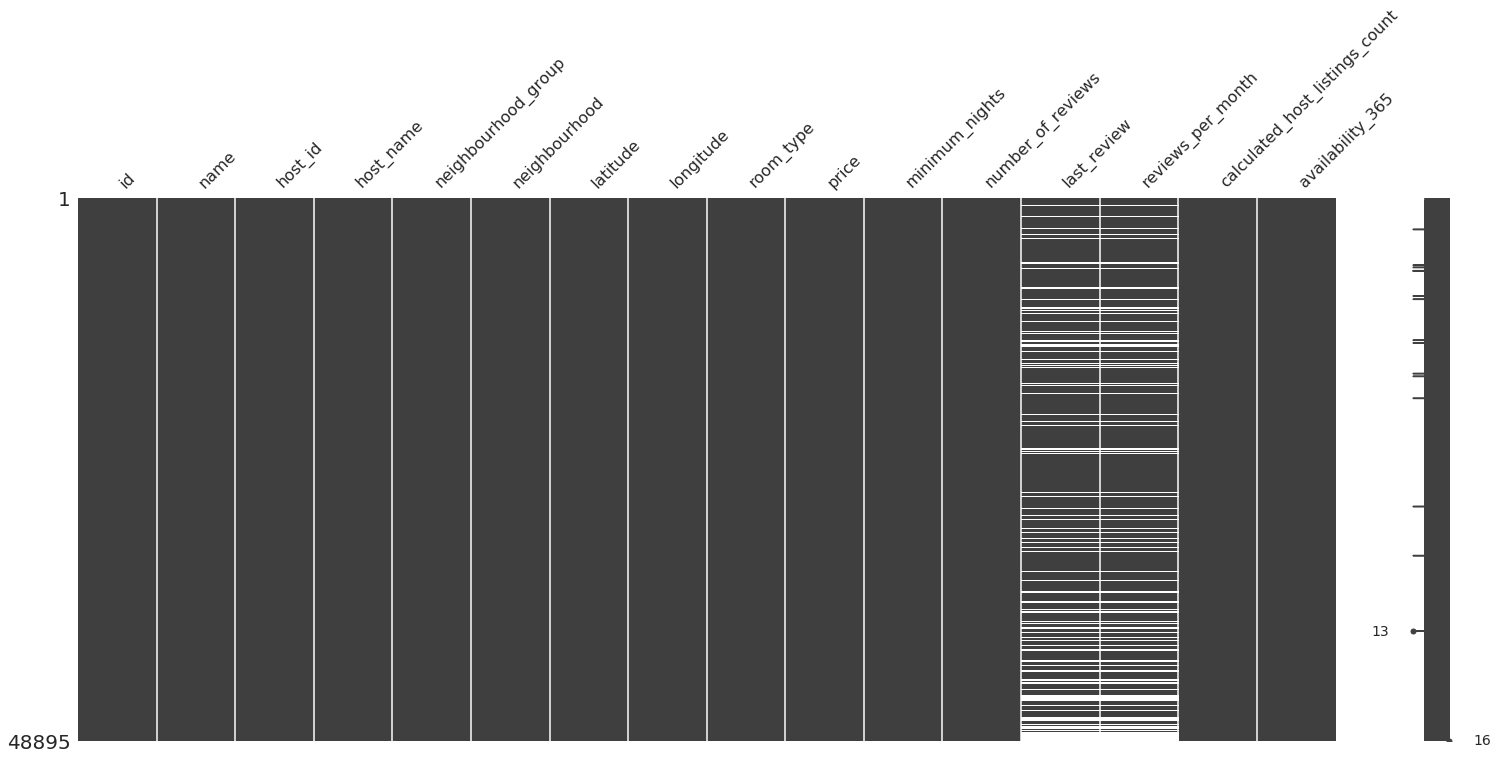

In [7]:
import missingno as msno 
msno.matrix(airbnb)

As you see the white lines, there are lot many missing/unentered values in two of the **review features**. It could be due to the host neglecting to provide review for the stay. Since this is a large record of data we can't completely see how many missing values we have visually, it's better to count the null values for all features

In [8]:
print('Data columns with null values:',airbnb.isnull().sum(), sep = '\n')

Data columns with null values:
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


**Inference**
* We have null data in **name feature** which we less likely to use for our data
* There are nearly **10052 null records** in last_review and reviews_per_month column


# 4. Data Wrangling
## 4a. Handling mis_ing values
First lets focus on the missing data in review features,if we drop the rows which has null values we might sabotage some  potential information from the dataset. I guess we have to **impute values **into the NaN records which leads us to accurate models. If you see the **last_review column** has dates, I don't think it adds much value to our analysis so we can drop that column as well and we will impute the null values in reviews_per_month with **zero**

In [9]:
airbnb['reviews_per_month'].fillna(value=0, inplace=True)
print('Reviews_per_month column with null values:',airbnb['reviews_per_month'].isnull().sum(), sep = '\n')

Reviews_per_month column with null values:
0


Yayy ! we have cleared that reviews_per_month with **zero null values**. Now it's time to drop unwanted features !

In [10]:
airbnb.drop(['id','host_name','last_review'], axis = 1,inplace=True) 
airbnb.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


## 4b. ....... Outliers
Outliers are unusual values in your dataset, and they can distort statistical analyses and violate their assumptions. Unfortunately, all analysts will confront outliers and be forced to make decisions about what to do with them. Given the problems they can cause, you might think that it’s best to remove them from your data. But, that’s not always the case. Removing outliers is legitimate only for specific reasons.Outliers can be very informative about the subject-area and data collection process. It’s essential to understand how outliers occur and whether they might happen again as a normal part of the process or study area. Unfortunately, resisting the temptation to remove outliers inappropriately can be difficult. Outliers increase the variability in your data, which decreases statistical power. Consequently, excluding outliers can cause your results to become statistically significant. **In our case, let's first visualize our data and decide on what to do with the outliers**

Text(0.5, 1.0, 'reviews_per_month')

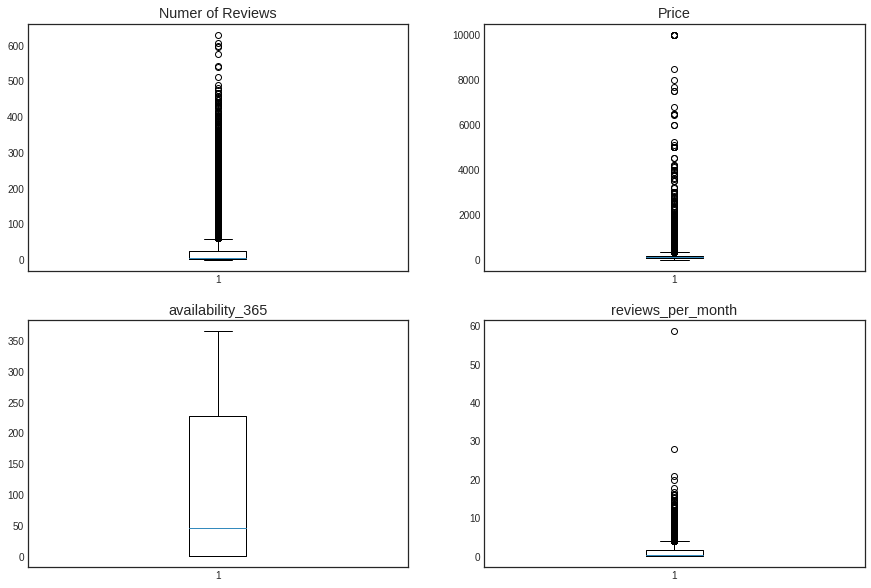

In [11]:
plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')
ax=plt.subplot(221)
plt.boxplot(airbnb['number_of_reviews'])
ax.set_title('Numer of Reviews')
ax=plt.subplot(222)
plt.boxplot(airbnb['price'])
ax.set_title('Price')
ax=plt.subplot(223)
plt.boxplot(airbnb['availability_365'])
ax.set_title('availability_365')
ax=plt.subplot(224)
plt.boxplot(airbnb['reviews_per_month'])
ax.set_title('reviews_per_month')

oof! except **availability_365** all other numerical factors have huge amount of outliers,as from my experience it's better to remove these outliers because it will significantly disrupt our statistical analysis.

### Removing outliers
Let's remove those outliers using **IQR** method

In [12]:
Q1 = airbnb['price'].quantile(0.25)
Q3 = airbnb['price'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (airbnb['price'] >= Q1 - 1.5 * IQR) & (airbnb['price'] <= Q3 + 1.5 *IQR)
airbnb1=airbnb.loc[filter]

Q1 = airbnb1['number_of_reviews'].quantile(0.25)
Q3 = airbnb1['number_of_reviews'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (airbnb1['number_of_reviews'] >= Q1 - 1.5 * IQR) & (airbnb1['number_of_reviews'] <= Q3 + 1.5 *IQR)
airbnb2=airbnb1.loc[filter]


Q1 = airbnb2['reviews_per_month'].quantile(0.25)
Q3 = airbnb2['reviews_per_month'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (airbnb2['reviews_per_month'] >= Q1 - 1.5 * IQR) & (airbnb2['reviews_per_month'] <= Q3 + 1.5 *IQR)
airbnb_new=airbnb2.loc[filter]

Text(0.5, 1.0, 'reviews_per_month')

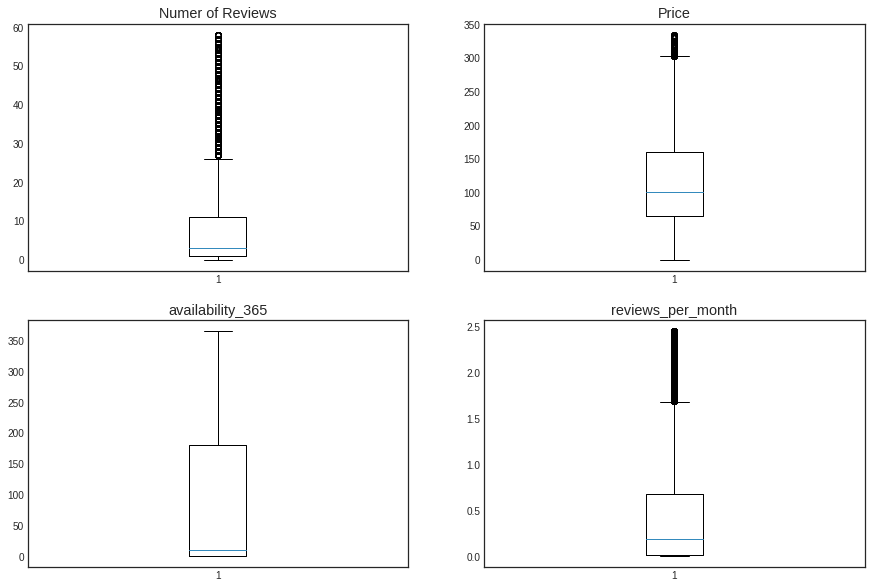

In [13]:
plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')
ax=plt.subplot(221)
plt.boxplot(airbnb_new['number_of_reviews'])
ax.set_title('Numer of Reviews')
ax=plt.subplot(222)
plt.boxplot(airbnb_new['price'])
ax.set_title('Price')
ax=plt.subplot(223)
plt.boxplot(airbnb_new['availability_365'])
ax.set_title('availability_365')
ax=plt.subplot(224)
plt.boxplot(airbnb_new['reviews_per_month'])
ax.set_title('reviews_per_month')

The majority of the outliers has been removed ! Great

# 5.Data Visualization
## 5a.Count of categorical Variable-Bar Chart

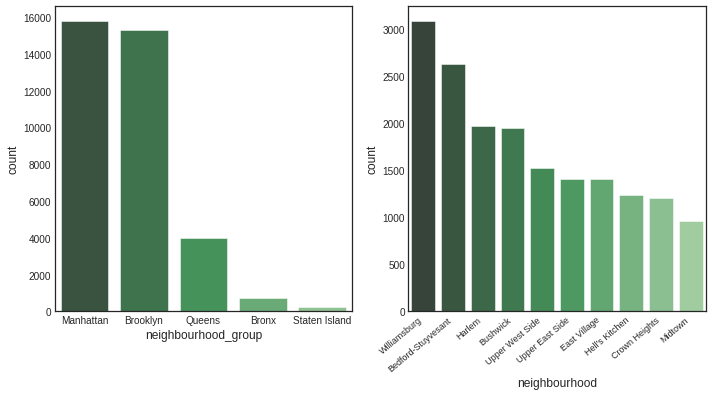

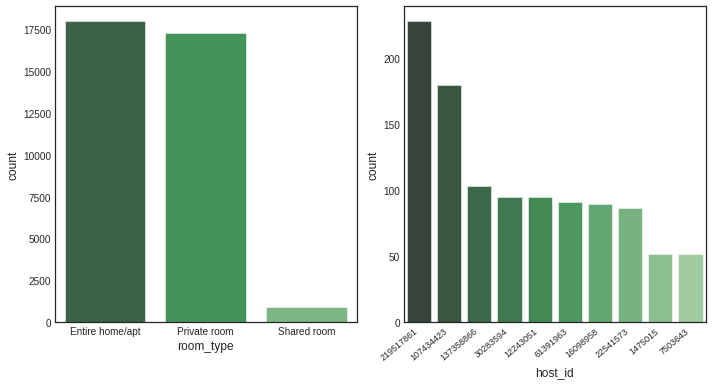

In [14]:
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')
#Neighbourhood group
plt.subplot(221)
sns.countplot(x="neighbourhood_group", data=airbnb_new, palette="Greens_d",
              order=airbnb_new.neighbourhood_group.value_counts().index)
fig = plt.gcf()
fig.set_size_inches(10,10)

#Top 10 Neighbourhood
plt.subplot(222)
ax=sns.countplot(x="neighbourhood", data=airbnb_new, palette="Greens_d",
              order=airbnb_new.neighbourhood.value_counts().iloc[:10].index)
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=9)
plt.tight_layout()
plt.show()

#Room type
plt.subplot(223)
sns.countplot(x="room_type", data=airbnb_new, palette="Greens_d",
              order=airbnb_new.room_type.value_counts().index)
fig = plt.gcf()
fig.set_size_inches(10,10)

#Top 10 hosts
plt.subplot(224)
ax=sns.countplot(x="host_id", data=airbnb_new, palette="Greens_d",
              order=airbnb_new.host_id.value_counts().iloc[:10].index)
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=9)
plt.tight_layout()
plt.show()

**Inference**
* In **neighbourhood group(location)**,Manhattan and Brooklyn stands in the top 2 positions respectively owing to the size and number of people who booked a room and it is followed by Queens, Bronx and Staten Island
* The top 10 of **neighbourhood(area)** is displayed second and Williamsburg stands top with most no. of books of nearly 3000
* Most of the **Entire home** were booked than private and shared room type
* host id **219517861** has the most number of books and he/she is the best customer of Airbnb in the NY

## 5b. Numerical factors-Distribution plot

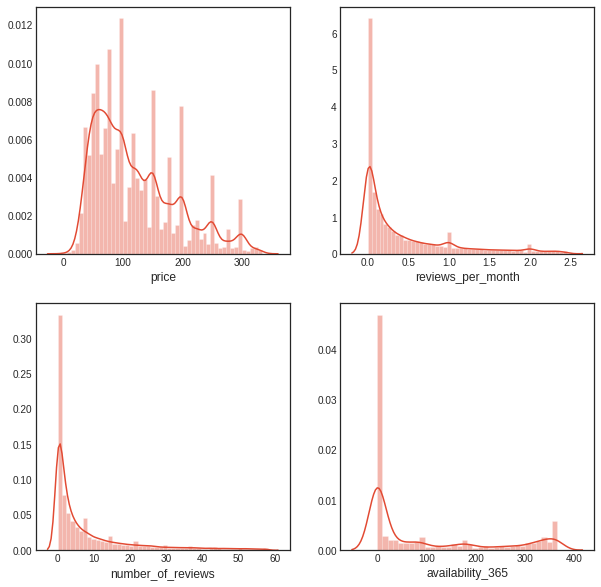

In [15]:
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')
plt.subplot(221)
sns.distplot(airbnb_new['price'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.subplot(222)
sns.distplot(airbnb_new['reviews_per_month'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.subplot(223)
sns.distplot(airbnb_new['number_of_reviews'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.subplot(224)
sns.distplot(airbnb_new['availability_365'])
fig = plt.gcf()
fig.set_size_inches(10,10)


**Inference**
* All the numerical factors are having **right skewed distribution**
* **Price factor** has an unstable distribution 
* Both the **review factors** distribution are similar as they are dependent

We need to preprocess these data before sending into the model

## 5c. Distribution of prices across location- Box Plot

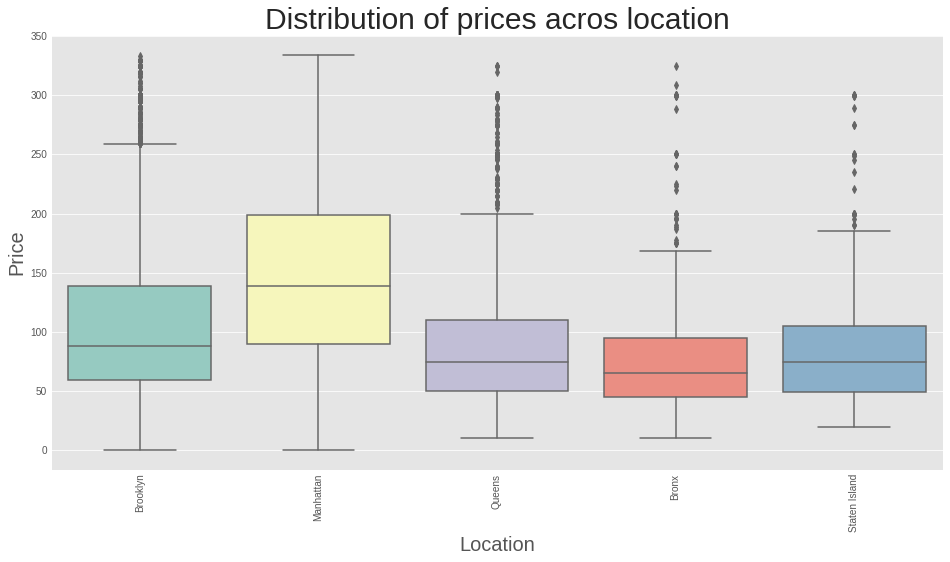

In [16]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (16, 8)
ax = sns.boxplot(x = airbnb_new['neighbourhood_group'], y =airbnb_new['price'], data = airbnb_new, palette = 'Set3')
ax.set_xlabel(xlabel = 'Location', fontsize = 20)
ax.set_ylabel(ylabel = 'Price', fontsize = 20)
ax.set_title(label = 'Distribution of prices acros location', fontsize = 30)
plt.xticks(rotation = 90)
plt.show()

**Inference**
* The average prices of Brooklyn,Queens and Statent Island is more are less the same which varies around **75-100 dollars **
* The prices are really high in Manhattan as the average price comes around **150 dollars** and maximum reaches near **350 dollars**
* The prices in Bronx are comparatively low as it average price is around **60 dollars.**

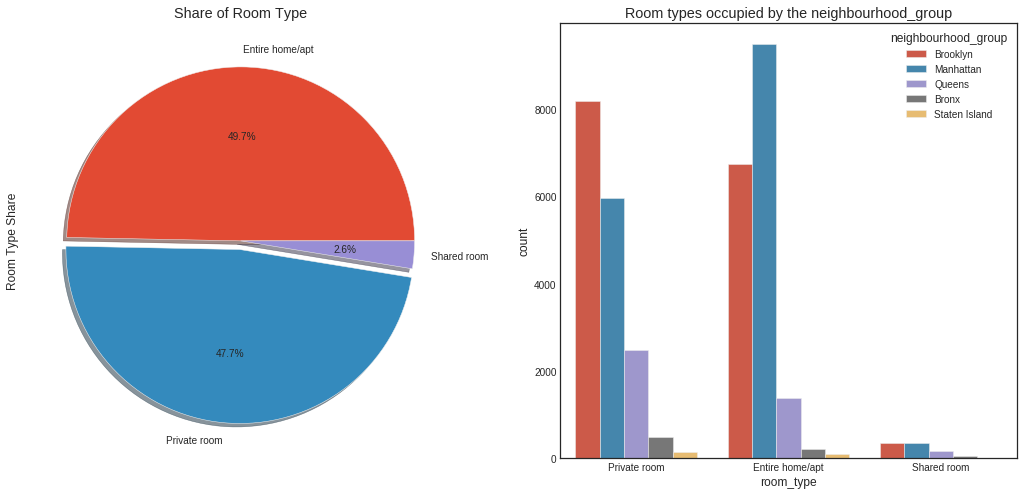

In [17]:
#Code forked from-https://www.kaggle.com/biphili/hospitality-in-era-of-airbnb
plt.style.use('seaborn-white')
f,ax=plt.subplots(1,2,figsize=(18,8))
airbnb_new['room_type'].value_counts().plot.pie(explode=[0,0.05,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Share of Room Type')
ax[0].set_ylabel('Room Type Share')
sns.countplot(x = 'room_type',hue = "neighbourhood_group",data = airbnb_new)
ax[1].set_title('Room types occupied by the neighbourhood_group')
plt.show()

**Inference**
* Very less(**2.7%**) people prefer shared room, may be people are not comfortable to stay with strangers in NY
* More than 8000 people in Manhattan prefer **Entire home/ apartment **
* Nearly around 8000 people in Brooklyn prefer **private room**
* People in **Staten island** seldom book through airbnb


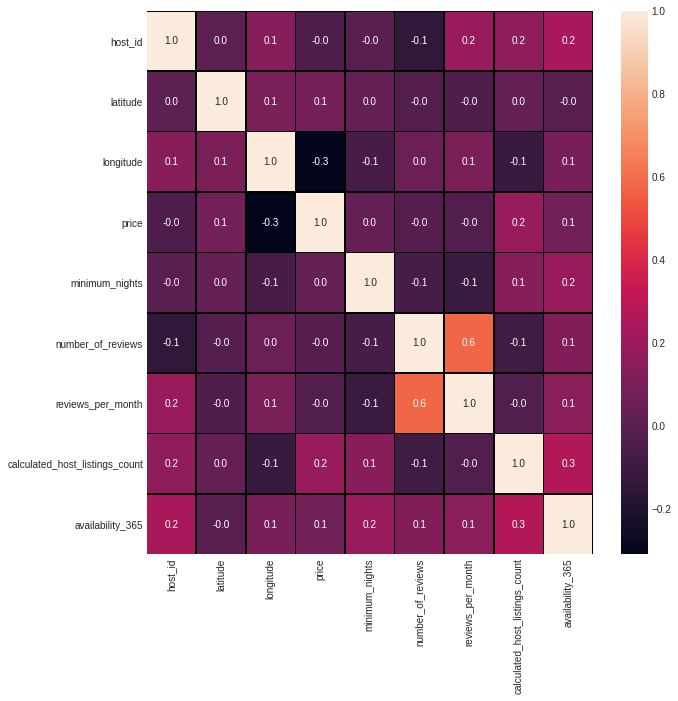

In [18]:
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(airbnb_new.corr(),annot=True,linewidths=0.5,linecolor="black",fmt=".1f",ax=ax)
plt.show()

**Inference:**
* Number of reviews and reviews per month have strong positive correlation and it is very obvious
* Availability_365 and minimum nights have a small positive correlation(0.2) which shows that whenever the list was displayed people stayed there, which is also obvious
* Price and Calculated list hosting have a small positive correlation(0.2) which shows that price has been increased when more number of lists have been shown to the host



## 5d. Geographical analysis- Scatter Plot
Now let's visualise our data according to the geographical locations.We use latitude and longitude data for this plots. The first plot shows the places in New York which can be used as our reference

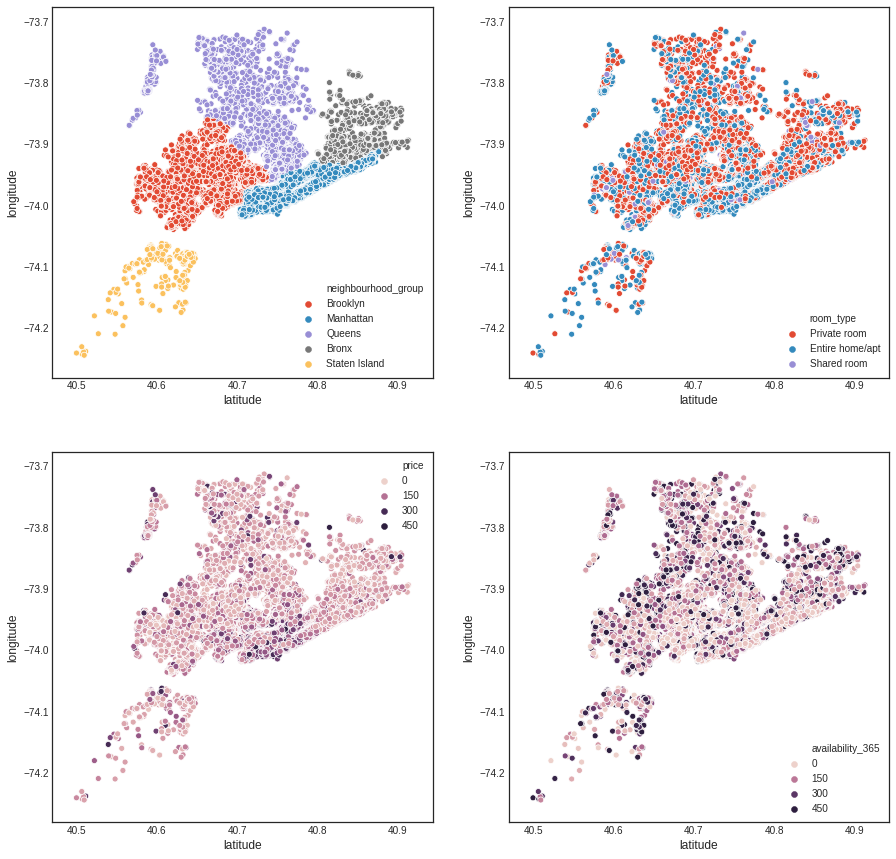

In [19]:
plt.figure(figsize = (15, 15))
plt.style.use('seaborn-white')
plt.subplot(221)
sns.scatterplot(x="latitude", y="longitude",hue="neighbourhood_group", data=airbnb_new)
plt.subplot(222)
sns.scatterplot(x="latitude", y="longitude",hue="room_type", data=airbnb_new)
plt.subplot(223)
sns.scatterplot(x="latitude", y="longitude",hue="price", data=airbnb_new)
plt.subplot(224)
sns.scatterplot(x="latitude", y="longitude",hue="availability_365", data=airbnb_new)

**Inference**
* There are very less number of people who prefers shared room,and in **Staten Island many prefers Entire home/apartment**
* The price range in **Manhattan are pretty high** whereas the prices in **Staten Island are low** even most of them prefer Entire home/ apartment 
* **Brooklyn,Queens and Bronx** are being listed many number of days for airbnb space in a year than rest of the location

## 5e. Best Customers-Geopatial analysis

Now let's dive into the map of New York with a better visualization feature using **folium librar**y. **Thanks to Kaggle course** on [Geospatial analysis](https://www.kaggle.com/alexisbcook/interactive-maps#Choropleth-maps) for helping me get these amazing geographical visuals

### Heatmap of our data:
Let's look at which location is our data more collected from. Its shows the number of customers in each location as per our dataset

In [20]:
import pandas as pd
import geopandas as gpd
import math
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
m_1 = folium.Map(location=[40.7128,-74.0060], tiles='cartodbpositron', zoom_start=12)

# Adding a heatmap to the base map
HeatMap(data=airbnb_new[['latitude', 'longitude']], radius=10).add_to(m_1)

# Displaying the map
m_1

**Inference**
* Most of our data we got is from most of Queens and some parts of Brooklyn shown in red
* The purple areas are the lighter region where the data is available less, which means there are less customers/space in those regions

### Top customers(Reviews-50 plus)- Marker location plot

The top customers are the one who engages with airbnb. We have consider number of reviews given by the customers should be **above 50 as a criteria**

In [21]:
number_of_reviews = airbnb_new[(airbnb_new.number_of_reviews.isin(range(50,58)))]
# Creating a map
m_2 = folium.Map(location=[40.7128,-74.0060], tiles='cartodbpositron', zoom_start=13)

# Adding points to the map
for idx, row in number_of_reviews.iterrows():
    Marker([row['latitude'], row['longitude']]).add_to(m_2)

# Displaying the map
m_2

**Inference**
* There are lot of top customers who have given 50-58 reviews (**max no. of reviews is 58 in this dataset**)
* The top customers located in** Staten Island and near seaside are low**

### Clustering Markers- better view

**Please do zoom in and out and touch those markers to understand the review splitup based on location**

In [22]:
# Creating the map
m_3 = folium.Map(location=[40.7128,-74.0060], tiles='cartodbpositron', zoom_start=13)

# Adding points to the map
mc = MarkerCluster()
for idx, row in number_of_reviews.iterrows():
    if not math.isnan(row['longitude']) and not math.isnan(row['latitude']):
        mc.add_child(Marker([row['latitude'], row['longitude']]))
m_3.add_child(mc)

# Displaying the map
m_3

**Inference**
* There are a **total of 557 reviews by top customers**
* **322 ** are from Brooklyn followed by **178** in Queens
* Manhattan has **44** top customer reviews

# 6.Preprocessing data for ML model prediction 
First let's consider the feature inputs we will be using for the prediction,Let's consider **neighbourhood group, room type,minimum nights,availability_365, number of reviews,reviews per month and calculated_host_listings_count**. Let's process these feature inputs!

In [23]:
airbnb_features=airbnb_new[['neighbourhood_group','room_type','availability_365','minimum_nights','calculated_host_listings_count','reviews_per_month','number_of_reviews']]
airbnb_features.head()

,neighbourhood_group,room_type,availability_365,minimum_nights,calculated_host_listings_count,reviews_per_month,number_of_reviews
0,Brooklyn,Private room,365,1,6,0.21,9
1,Manhattan,Entire home/apt,355,1,2,0.38,45
2,Manhattan,Private room,365,3,1,0.00,0
4,Manhattan,Entire home/apt,0,10,1,0.10,9
6,Brooklyn,Private room,0,45,1,0.40,49


## 6a. One hot encoding- Neighbourhood and Room type
We can't preprocess the dataframe which has categorical data, so let's get some dummies instead of them

In [24]:
dummy_neighbourhood=pd.get_dummies(airbnb_features['neighbourhood_group'], prefix='dummy')
dummy_roomtype=pd.get_dummies(airbnb_features['room_type'], prefix='dummy')
airbnb_features = pd.concat([airbnb_features,dummy_neighbourhood,dummy_roomtype],axis=1)
airbnb_features.drop(['neighbourhood_group','room_type'],axis=1, inplace=True)
airbnb_features

,availability_365,minimum_nights,calculated_host_listings_count,reviews_per_month,number_of_reviews,dummy_Bronx,dummy_Brooklyn,dummy_Manhattan,dummy_Queens,dummy_Staten Island,dummy_Entire home/apt,dummy_Private room,dummy_Shared room
0,365,1,6,0.21,9,0,1,0,0,0,0,1,0
1,355,1,2,0.38,45,0,0,1,0,0,1,0,0
2,365,3,1,0.00,0,0,0,1,0,0,0,1,0
4,0,10,1,0.10,9,0,0,1,0,0,1,0,0
6,0,45,1,0.40,49,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,9,2,2,0.00,0,0,1,0,0,0,0,1,0
48891,36,4,2,0.00,0,0,1,0,0,0,0,1,0
48892,27,10,1,0.00,0,0,0,1,0,0,1,0,0
48893,2,1,6,0.00,0,0,0,1,0,0,0,0,1


Sweeet! let's standardize our dataframe 

## 5b. Standardizing our dataset + Setting Feature(X) and Target(y)

In [25]:
from sklearn import preprocessing
X=preprocessing.scale(airbnb_features)
y=airbnb_new.price
print(X)
print(y)

[[ 2.05772879 -0.32012801 -0.04432648 ... -0.99381927  1.04623811
  -0.16236422]
 [ 1.98104135 -0.32012801 -0.16550653 ...  1.00621917 -0.95580537
  -0.16236422]
 [ 2.05772879 -0.22909945 -0.19580154 ... -0.99381927  1.04623811
  -0.16236422]
 ...
 [-0.53430689  0.0895005  -0.19580154 ...  1.00621917 -0.95580537
  -0.16236422]
 [-0.7260255  -0.32012801 -0.04432648 ... -0.99381927 -0.95580537
   6.15899258]
 [-0.56498187 -0.04704234 -0.19580154 ... -0.99381927  1.04623811
  -0.16236422]]
0        149
1        225
2        150
4         80
6         60
        ... 
48890     70
48891     40
48892    115
48893     55
48894     90
Name: price, Length: 36130, dtype: int64


**OOPS!**, our target dataframe **turned into an array**, let's turn it into a dataframe again 

In [26]:
X = pd.DataFrame(X)
X=X.rename(index=str, columns={0:'availability_365',1:'minimum_nights',2:'calculated_host_listings_count',3:'reviews_per_month',
                             4:'number_of_reviews',5:'dummy_Bronx',6:'dummy_Brooklyn',7:'dummy_Manhattan',8:'dummy_Queens',9:'dummy_Staten Island',
                             10:'dummy_Entire home/apt',11:'dummy_Private room',12:'dummy_Shared room'})
X.head()

,availability_365,minimum_nights,calculated_host_listings_count,reviews_per_month,number_of_reviews,dummy_Bronx,dummy_Brooklyn,dummy_Manhattan,dummy_Queens,dummy_Staten Island,dummy_Entire home/apt,dummy_Private room,dummy_Shared room
0,2.057729,-0.320128,-0.044326,-0.411679,0.059627,-0.145597,1.166344,-0.881923,-0.353581,-0.083641,-0.993819,1.046238,-0.162364
1,1.981041,-0.320128,-0.165507,-0.123768,3.028170,-0.145597,-0.857380,1.133885,-0.353581,-0.083641,1.006219,-0.955805,-0.162364
2,2.057729,-0.229099,-0.195802,-0.767335,-0.682508,-0.145597,-0.857380,1.133885,-0.353581,-0.083641,-0.993819,1.046238,-0.162364
3,-0.741363,0.089500,-0.195802,-0.597975,0.059627,-0.145597,-0.857380,1.133885,-0.353581,-0.083641,1.006219,-0.955805,-0.162364
4,-0.741363,1.682500,-0.195802,-0.089896,3.358008,-0.145597,1.166344,-0.881923,-0.353581,-0.083641,-0.993819,1.046238,-0.162364


This looks neat with all the **standardized scale**. Now let's jump into **Machine Learning !!**

# 7.Machine Learning models
## 7a.Pipeline
Now before splitting into training and test data, let's run through some **cross validation using pipeline **

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

my_pipeline = Pipeline(steps=[('model', RandomForestRegressor(n_estimators=50,
                                                              random_state=0))])

## 7b.Cross Validation-MAE + Accuracy
Now let's send our target and features for **cross validation**

In [28]:
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)
print("Average MAE score (across experiments):",scores.mean())

MAE scores:
 [39.24337539 38.05705821 37.01498814 37.85865875 43.03196765]
Average MAE score (across experiments): 39.04120963018335


**MAE=39.04!!!** Thats a huge error.Now, let's try with **pipepline ** and measure accuracy

In [29]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Since there is no preprocessing, we don't need a pipeline (used anyway as best practice!)
my_pipeline = make_pipeline(RandomForestClassifier(n_estimators=100))
cv_scores = cross_val_score(my_pipeline, X, y, 
                            cv=5,
                            scoring='accuracy')

print("Cross-validation accuracy: %f" % cv_scores.mean())

Cross-validation accuracy: 0.046720


**4.7 % accuracy!!** That's pretty bad. 

## 7c.Removing Data Leakage factors
Now let us try to identify possible Data Leakage feature and remove it. If we look into reviews per month and number of reviews, it **does not help us predict the price as this feature will occur only after the purchase(stay) gets over**. So, let's remove this feature and check for accuracy

In [30]:
# Drop leaky predictors from dataset
potential_leaks = ['reviews_per_month','number_of_reviews']
X2 = X.drop(potential_leaks, axis=1)

# Evaluate the model with leaky predictors removed
cv_scores = cross_val_score(my_pipeline, X2, y, 
                            cv=5,
                            scoring='accuracy')

print("Cross-val accuracy: %f" % cv_scores.mean())

Cross-val accuracy: 0.059756


**5.9% accuracy**. That's an improvement but that isn't close to being called as a good model.Do you have any suggestions on improving this model accuracy ? Should I have considered some other features? Drop some comments and help me

## 7d. Splitting into training and test dataset
Now let's split our dataset into training and test/validation data for both feature and label variables

In [31]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X2, y, random_state=1)

## 7e. Logistic Regression model and accuracy
Logistic regression is a supervised learning classification algorithm used to predict the probability of a target variable. The nature of target or dependent variable is dichotomous, which means there would be only two possible classes. Mathematically, a logistic regression model predicts P(Y=1) as a function of X.

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(train_X, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
y_pred = logreg.predict(val_X)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(val_X, val_y)))

Accuracy of logistic regression classifier on test set: 0.08


**8% accuracy ** for our Logistic Regression model. Pretty bad

## 7f. Decision Tree Regressor
Decision Tree is a decision-making tool that uses a flowchart-like tree structure or is a model of decisions and all of their possible results, including outcomes, input costs and utility.Decision-tree algorithm falls under the category of supervised learning algorithms. It works for both continuous as well as categorical output variables. Now we are creating the function directly to get Mean Absolute error to fasten up our coding

In [34]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

### For different leaf nodes
Let's check MAE at each leaf nodes of our decision tree

In [35]:
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  38
Max leaf nodes: 50  		 Mean Absolute Error:  36
Max leaf nodes: 500  		 Mean Absolute Error:  36
Max leaf nodes: 5000  		 Mean Absolute Error:  40


The error dips and then rises when the leaf nodes increases. This model is getting pretty bad 

## 7g. Random Forest Regressor
A Random Forest is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees and a technique called Bootstrap Aggregation, commonly known as bagging. The basic idea behind this is to combine multiple decision trees in determining the final output rather than relying on individual decision trees.

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# function for comparing different approaches
def score_dataset(train_X, val_X, train_y, val_y):
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(train_X, train_y)
    preds = model.predict(val_X)
    return mean_absolute_error(val_y, preds)

In [37]:
print("Mean Absolute error of the Model:")
print(score_dataset(train_X, val_X, train_y, val_y))

Mean Absolute error of the Model:
37.496143488215644


**MAE of 37.49** . Now lets boost our model using XGBoost

## 7h. XGBoost
XGBoost is an algorithm that has recently been dominating applied machine learning and Kaggle competitions for structured or tabular data. XGBoost is an implementation of gradient boosted decision trees designed for speed and performance

In [38]:
from xgboost import XGBRegressor

my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)
my_model.fit(train_X, train_y, 
             early_stopping_rounds=5, 
             eval_set=[(val_X, val_y)], 
             verbose=False)
predictions = my_model.predict(val_X)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, val_y)))

Mean Absolute Error: 35.59312817056116


**MAE of 35.59** ! That's an improvement

# 8. Actual Vs Predicted
Let's look how our model has predicted,by comparing actual and predicted values

In [39]:
#Code forked from: https://www.kaggle.com/biphili/hospitality-in-era-of-airbnb
error_airbnb = pd.DataFrame({
        'Actual Values': np.array(val_y).round(),
        'Predicted Values': predictions.round()}).head(20)

error_airbnb.head(5)

,Actual Values,Predicted Values
0,205,146.0
1,40,58.0
2,50,69.0
3,50,63.0
4,175,158.0


# Conclusion
### For now, I can conclude that our model accuracy is pretty bad. I guess it is because of overfitting. I have checked with other[ top performers notebook of this dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data/kernels) and they too have high MAE and low accuracy in their models. If I can do anything to improve my model, Feel free to drop your suggestions in comments. 

## Hit upvote if you like my work and also check out my [other notebooks](https://www.kaggle.com/benroshan/notebooks)